In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5)
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=128, shuffle=False, num_workers=2
)


In [11]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 512),
            nn.ReLU(inplace=True),

            nn.Linear(512, 784),
            nn.Tanh()
        )
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.02)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, z):
        out = self.net(z)
        return out

In [12]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.02)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, x):
        out = self.net(x)
        return out

In [13]:
Gen = Generator().to(device)
Disc = Discriminator().to(device)

criterion = nn.BCELoss()


optim_g = optim.Adam(Gen.parameters(), lr=2e-4, betas=(0.5, 0.999))
optim_d = optim.Adam(Disc.parameters(), lr=1e-3, betas=(0.5, 0.999)) # Increases LR

fixed_noise = torch.randn(5, 100, device=device)


Epoch [1/20] Batch 0/469 Loss D: 0.7560, Loss G: 0.6991, D(x): 0.9365, D(G(z)): 0.4970
Epoch [1/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [1/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


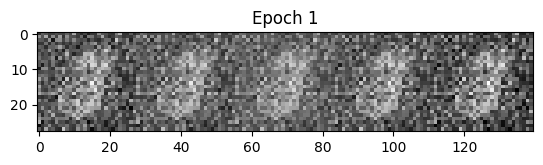

Epoch [2/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [2/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [2/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


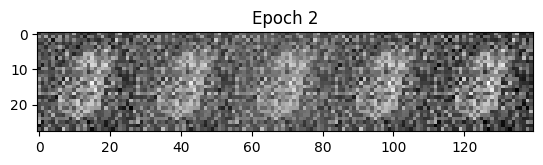

Epoch [3/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [3/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [3/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


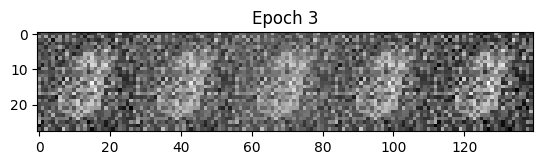

Epoch [4/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [4/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [4/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


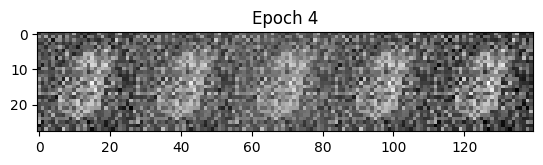

Epoch [5/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [5/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [5/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


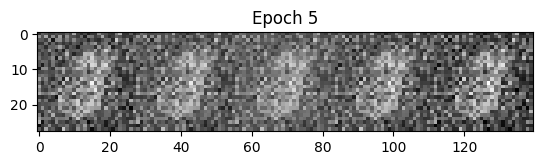

Epoch [6/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [6/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [6/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


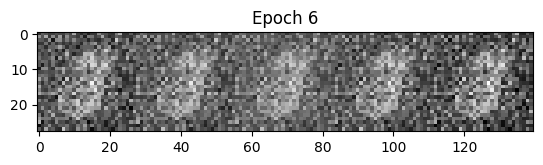

Epoch [7/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [7/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [7/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


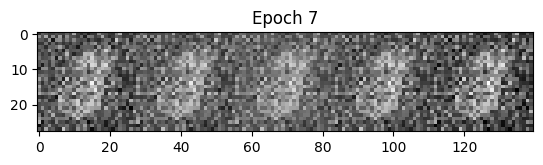

Epoch [8/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [8/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [8/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


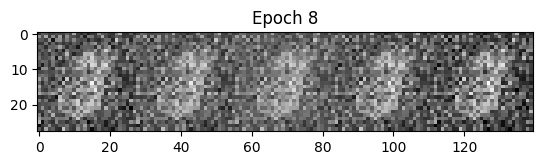

Epoch [9/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [9/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [9/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


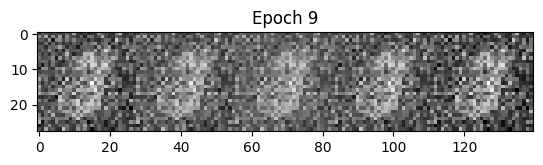

Epoch [10/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [10/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [10/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


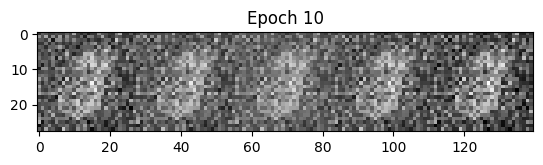

Epoch [11/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [11/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [11/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


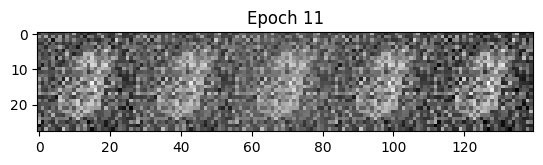

Epoch [12/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [12/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [12/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


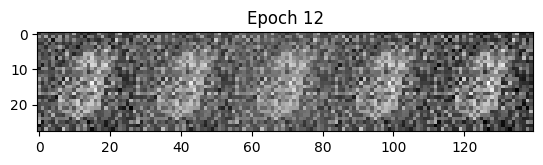

Epoch [13/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [13/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [13/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


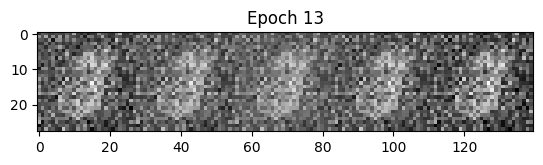

Epoch [14/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [14/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [14/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


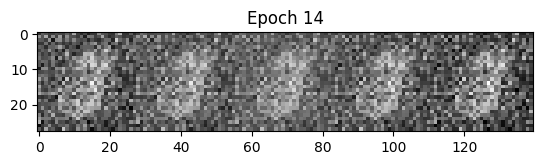

Epoch [15/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [15/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [15/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


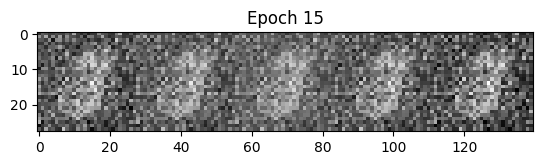

Epoch [16/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [16/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [16/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


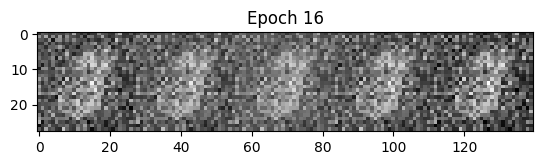

Epoch [17/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [17/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [17/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


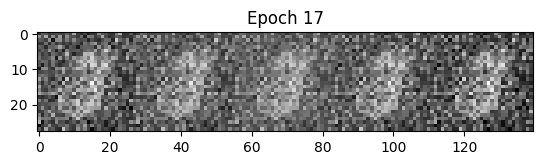

Epoch [18/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [18/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [18/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


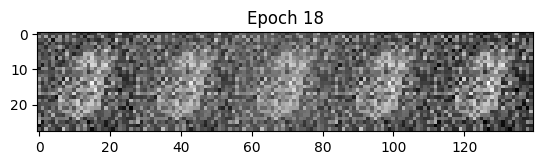

Epoch [19/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [19/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [19/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


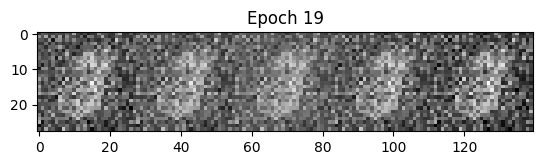

Epoch [20/20] Batch 0/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [20/20] Batch 200/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000
Epoch [20/20] Batch 400/469 Loss D: 100.0000, Loss G: 0.0000, D(x): 1.0000, D(G(z)): 1.0000


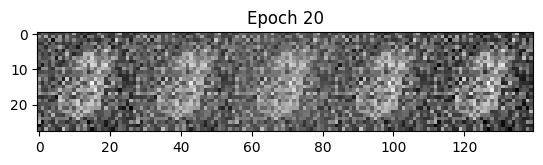

In [14]:
epochs = 20
losses_G = [] # List of avg values per epoch
losses_D = [] 

for epoch in range(epochs):
    epoch_losses_G = []
    epoch_losses_D = []
    for batch_idx, (real_imgs, _) in enumerate(trainloader):
        real_imgs = real_imgs.view(-1, 784).to(device)
        batch_size_curr = real_imgs.size(0)

        # Labels
        real_labels = torch.ones(batch_size_curr, 1, device=device)
        fake_labels = torch.zeros(batch_size_curr, 1, device=device)

        for _ in range(4):
            z = torch.randn(batch_size_curr, 100, device=device)
            fake_imgs = Gen(z)

            D_real = Disc(real_imgs)
            D_fake = Disc(fake_imgs.detach())

            loss_D_real = criterion(D_real, real_labels)
            loss_D_fake = criterion(D_fake, fake_labels)
            loss_D = loss_D_real + loss_D_fake

            optim_d.zero_grad()
            loss_D.backward()
            optim_d.step()

            if epoch >= 6:
                break

        z = torch.randn(batch_size_curr, 100, device=device)
        fake_imgs = Gen(z)
        D_fake = Disc(fake_imgs)

        loss_G = criterion(D_fake, real_labels)

        optim_g.zero_grad()
        loss_G.backward()
        optim_g.step()

        if batch_idx % 200 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] Batch {batch_idx}/{len(trainloader)} "
                  f"Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}, "
                  f"D(x): {D_real.mean().item():.4f}, D(G(z)): {D_fake.mean().item():.4f}")
        epoch_losses_D.append(loss_D.item())
        epoch_losses_G.append(loss_G.item())

    losses_D.append(np.mean(np.array(epoch_losses_D)))
    losses_G.append(np.mean(np.array(epoch_losses_G)))

    with torch.no_grad():
        fake_samples = Gen(fixed_noise).view(-1, 1, 28, 28)
        grid = torch.cat([fake_samples[i] for i in range(5)], dim=2)
        plt.imshow(grid.squeeze().cpu().numpy(), cmap="gray")
        plt.title(f"Epoch {epoch+1}")
        plt.show()

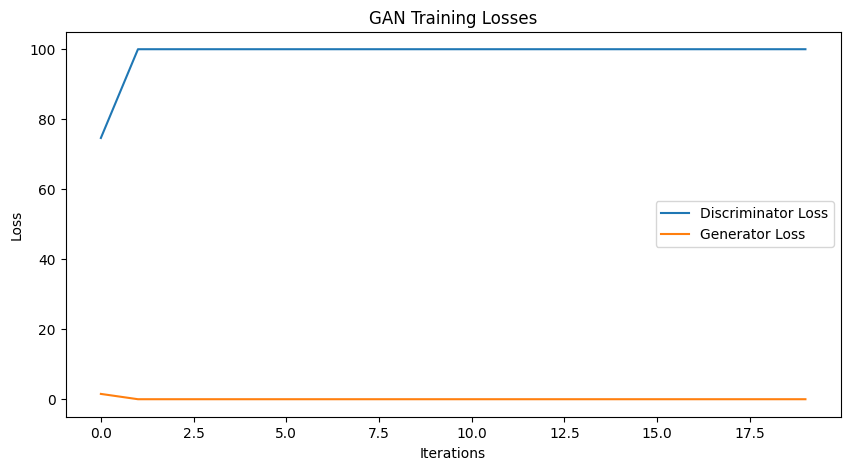

In [15]:
plt.figure(figsize=(10,5))
plt.plot(losses_D, label="Discriminator Loss")
plt.plot(losses_G, label="Generator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("GAN Training Losses")
plt.legend()
plt.show()

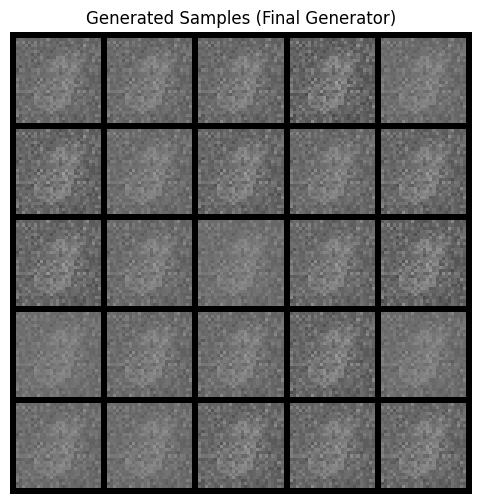

In [16]:
import torchvision.utils as vutils

z = torch.randn(25, 100, device=device)
with torch.no_grad():
    fake_imgs = Gen(z).view(-1, 1, 28, 28)

grid = vutils.make_grid(fake_imgs, nrow=5, normalize=True, value_range=(-1, 1))

plt.figure(figsize=(6,6))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy(), cmap="gray")
plt.axis("off")
plt.title("Generated Samples (Final Generator)")
plt.show()
